### Fraud Transaction Detection Model

### 1. Exploratory Data Analysis

#### 1.1 Load Libraries and Data

In [49]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime

In [23]:
train_df = pd.read_csv('../data/fraudTrain.csv.zip')
test_df = pd.read_csv('../data/fraudTest.csv.zip')
print(f'Train set: {train_df.shape} , Test set: {test_df.shape}')

Train set: (1296675, 23) , Test set: (555719, 23)


In [5]:
train_df.describe(include="all")

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,...,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,...,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00


In [6]:
train_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [7]:
test_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


#### 1.2 Check the dataset if it is balanced

In [8]:
train_df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [9]:
7506/(1289169+7506) * 100

0.5788651743883394

Dataset is imbalanced:
1. There are 1289169 rows that are not fraud.
2. 7506 rows are fraud. That makes up 0.57 % of the entire dataset (train and test combined). This is reasonable as in reality, fraud cases make up low percentage

In [10]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

- Locations: The location is important in helping us detect unusual transaction. If a user frequently perform transaction in Country A, but if there any transactions being performed in countries so far away from Country A, that will be indicator that it may be unusual. Hence columns `street, city, state, zip, lat, long` would be help to identify based on location.
- Time of transaction: If a user frequently perform transactions from time window x to y, and if the new transaction does not seem to follow the pattern, this may be also suspicious and can be taken into account while assessing the fraudulent transaction. Hence columns `trans_date_trans_time, unix_time` would be helpful based on time.
- Age, Gender, Job: Some fraudsters may target a certain group of people hence columns `dob, job, gender` would be helpful in helping us find any correlation as well.
- Keeping these in mind we shall start diving into understanding the data to see what makes up a fraud transaction.

#### 1.3 Understanding characteristics of fraudent transactions

In [13]:
frauds = train_df[train_df['is_fraud'] == 1]
# as first column is unnamed, we will start from 2
frauds = frauds.iloc[:, 1:]
frauds.shape

(7506, 22)

In [15]:
frauds.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1


##### 1.3.1 Gender

In [25]:
# demographic
print(frauds['gender'].isna().value_counts())
frauds['gender'].value_counts()


False    7506
Name: gender, dtype: int64


M    3771
F    3735
Name: gender, dtype: int64

- There are no missing values in gender.
- There is a a balanced number of Male and Female.

##### 1.3.2 Category

In [36]:
frauds['category'].isna().value_counts()

False    7506
Name: category, dtype: int64

Since there are only 14 main category of transactions, we can visualise all.

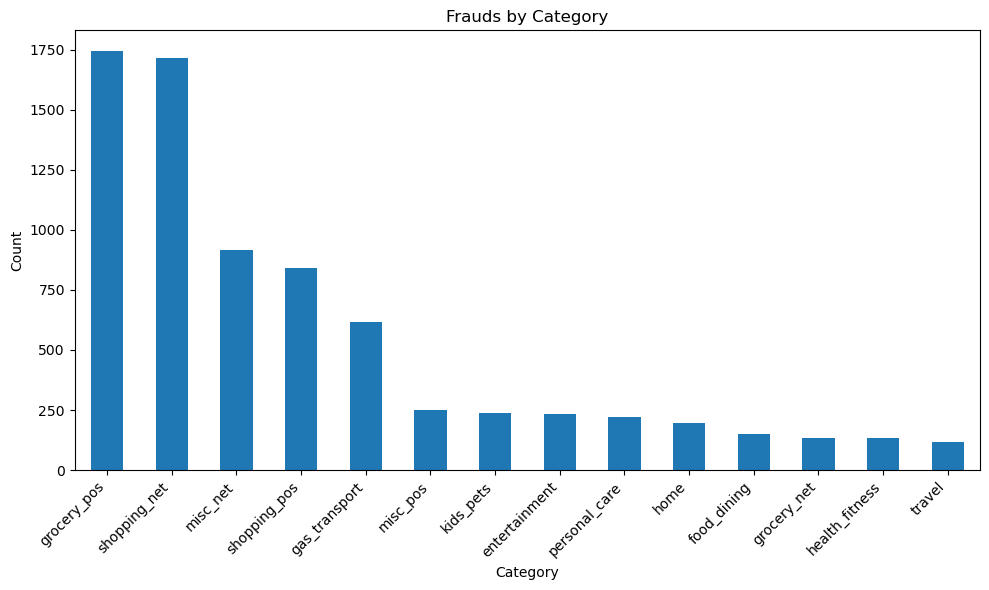

In [38]:
# Plotting the bar chart
frauds['category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Frauds by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 3 Categories are:
1. grocery_pos
2. shopping_net
3. misc_net

##### 1.3.3 Merchants

In [40]:
frauds['merchant'].isna().value_counts()

False    7506
Name: merchant, dtype: int64

In [39]:
frauds['merchant'].nunique()

679

There are 679 merchants, hence it would be a good idea to narrow down top x number of merchants with highest fraud to visualise

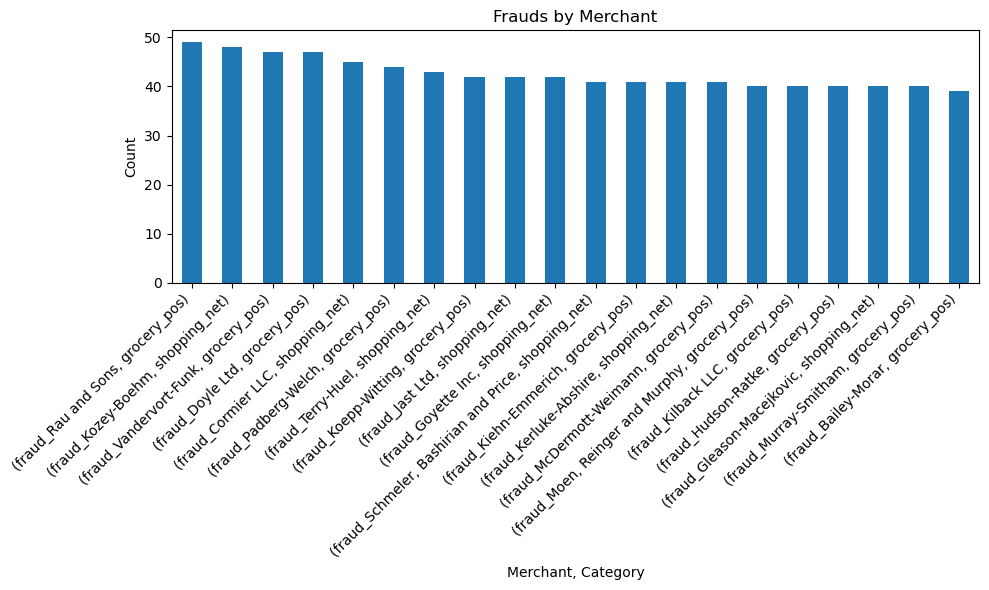

In [41]:
# Plotting the bar chart, lets also see what category the merchants all under.
frauds[['merchant', 'category']].value_counts().nlargest(20).plot(kind='bar', figsize=(10, 6))
plt.title('Frauds by Merchant')
plt.xlabel('Merchant, Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


As expected, these merchants are from top 3 fraud categories as well.

#### 1.3.4 Customer Jobs

In [42]:
frauds['job'].isna().value_counts()

False    7506
Name: job, dtype: int64

In [44]:
frauds['job'].nunique()

443

Since there are 443 job titles, it would be difficult to visualise. Lets see top 30.

In [45]:
frauds['job'].value_counts().nlargest(30)

Materials engineer                                   62
Trading standards officer                            56
Naval architect                                      53
Exhibition designer                                  51
Surveyor, land/geomatics                             50
Mechanical engineer                                  49
Prison officer                                       48
Quantity surveyor                                    48
Audiological scientist                               46
Senior tax professional/tax inspector                45
Copywriter, advertising                              45
Film/video editor                                    44
Scientist, biomedical                                44
Financial trader                                     43
Television production assistant                      42
Podiatrist                                           41
Private music teacher                                41
Buyer, industrial                               

They seem to be of all sectors from all backgrounds.

#### 1.3.5 Customer Age

In [46]:
frauds['dob'].isna().value_counts()

False    7506
Name: dob, dtype: int64

In [48]:
frauds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 2449 to 1295733
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  7506 non-null   object 
 1   cc_num                 7506 non-null   int64  
 2   merchant               7506 non-null   object 
 3   category               7506 non-null   object 
 4   amt                    7506 non-null   float64
 5   first                  7506 non-null   object 
 6   last                   7506 non-null   object 
 7   gender                 7506 non-null   object 
 8   street                 7506 non-null   object 
 9   city                   7506 non-null   object 
 10  state                  7506 non-null   object 
 11  zip                    7506 non-null   int64  
 12  lat                    7506 non-null   float64
 13  long                   7506 non-null   float64
 14  city_pop               7506 non-null   int64  
 15

In [51]:
# Step 1: Convert the column to a pandas datetime object
frauds['dob'] = pd.to_datetime(frauds['dob'])
# Step 2: Calculate age based on current date
current_date = datetime.now()
frauds['age'] = (current_date - frauds['dob']).astype('<m8[Y]')  # Calculating age in years and adding it as a new column

In [52]:
frauds['age'].nunique()

79

In [53]:
frauds['age'].describe()

count    7506.000000
mean       52.792299
std        18.852028
min        19.000000
25%        37.000000
50%        52.000000
75%        65.000000
max        98.000000
Name: age, dtype: float64

Age range from 19 to 98, starting from teens to elderly.

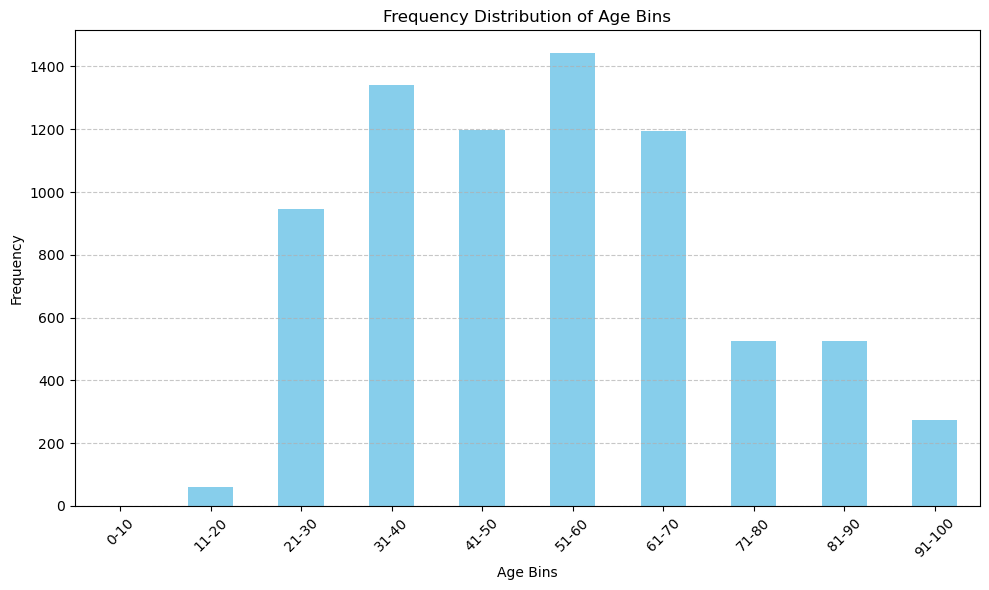

In [54]:
# Step 3: Define bins and bin labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Step 4: Bin the ages
frauds['age_bin'] = pd.cut(frauds['age'], bins=bins, labels=bin_labels)

# Step 5: Plot frequency distribution
plt.figure(figsize=(10, 6))
frauds['age_bin'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Age group 61-60 seens to be biggest target.
- 2nd biggest target is 31-40.
- 3rd: 41-50 and 61-70

#### 1.3.6 City of Residence

In [55]:
frauds['city'].isna().value_counts()

False    7506
Name: city, dtype: int64

In [56]:
frauds['city'].nunique()

702

In [59]:
# !pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 7.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.4 MB/s eta 0:00:00a 0:00:01m


In [62]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

scaling_factor = 50
frauds['marker_size'] = frauds['<replace_with_actual_size_column>'] * scaling_factor

# Create a new map using Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()

# Plot cities from 'frauds' DataFrame on the map with marker size proportional to 'marker_size' column
for index, row in frauds.iterrows():
    city = row['city']
    state = row['state']
    lat = row['lat']
    lon = row['long']
    marker_size = row['marker_size']
    ax.scatter(lon, lat, s=marker_size, color='r', alpha=0.5)  # Plot scatter point with size and transparency
    plt.text(lon, lat, f"{city}, {state}", fontsize=8, transform=ccrs.PlateCarree())  # Add city name and state as text

# Set extent of the map (you can adjust this to focus on a specific region)
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Add title
plt.title('Cities on Map with Marker Size')

# Show the map
plt.show()

KeyError: '<replace_with_actual_size_column>'

### 2. Data Cleaning

### 3. Data Peparation